In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

import pandas.plotting as pd_plot
import pandas as pd
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

from sklearn.ensemble import RandomForestRegressor
import sklearn.model_selection as ModelSelection
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold,StratifiedGroupKFold, cross_val_score

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearRemo

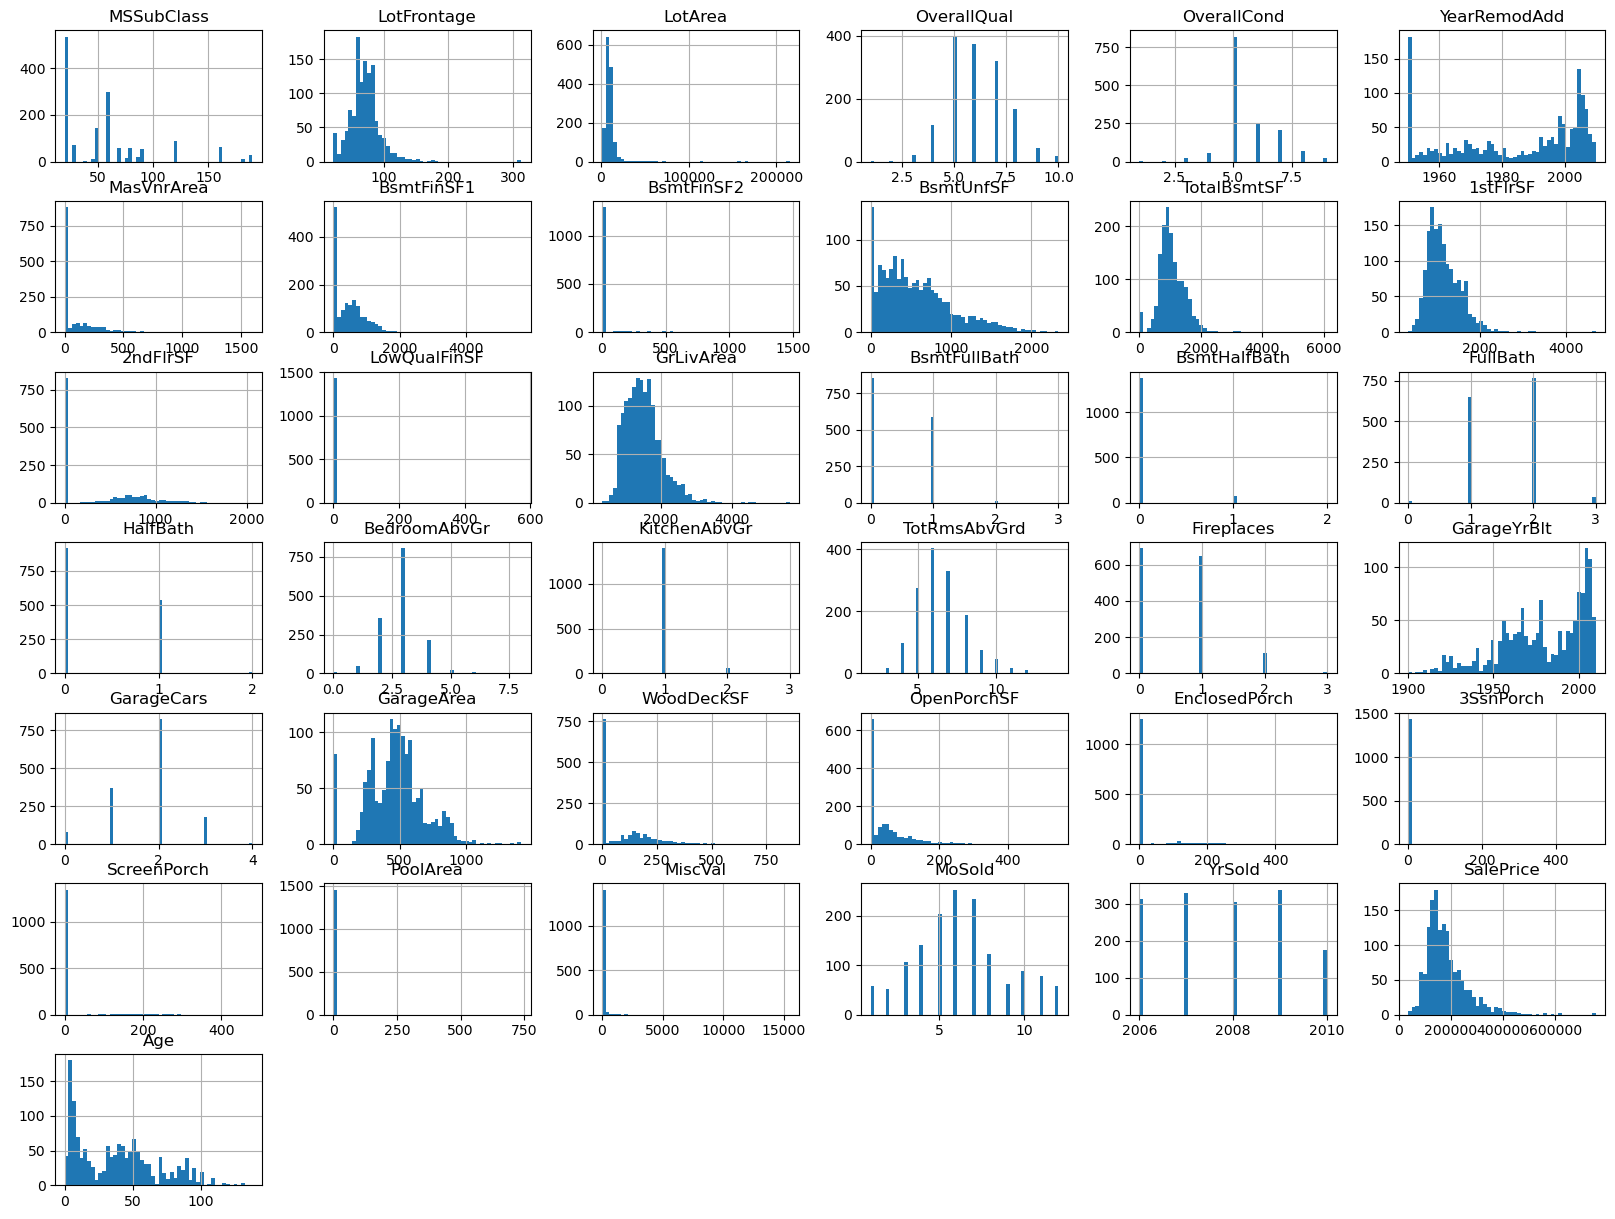

================correlation(abs)================


SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
Age              0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
KitchenAbvGr     0.135907
EnclosedPorch    0.128578
ScreenPorch      0.111447
PoolArea         0.092404
MSSubClass       0.084284
OverallCond      0.077856
MoSold           0.046432
3SsnPorch        0.044584
YrSold           0.028923
LowQualFinSF     0.025606
MiscVal          0.021190
BsmtHalfBath     0.016844
BsmtFinSF2   

/opt/conda/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=20.
  warnings.warn(



CV errors(lower is better): [4.44320287 4.44291091 4.53630462 4.47316482 4.45409055 4.47500898
 4.46826815 4.63285819 4.50978036 4.48252021 4.50860092 4.44347992
 4.49812929 4.55375409 4.55316555 4.51058242 4.5819496  4.73809898
 4.56371491 4.55206839]
CV errors Mean(lower is better): 4.521082686137474
CV errors Standard deviation(lower is better): 0.0709587561117603 



================<class 'sklearn.linear_model._coordinate_descent.ElasticNet'>================


================<class 'sklearn.tree._classes.DecisionTreeRegressor'>================


RMSE on validation set: 0.0


/opt/conda/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=20.
  warnings.warn(



CV errors(lower is better): [4.62330094 4.58362454 4.59409213 4.55499253 4.5774748  4.56902977
 4.56233437 4.67573599 4.59816284 4.5737195  4.52472642 4.5388003
 4.59393975 4.51868753 4.61229848 4.58228358 4.6609724  4.67147952
 4.65420223 4.54467542]
CV errors Mean(lower is better): 4.5907266520852
CV errors Standard deviation(lower is better): 0.04572620410758533 



================<class 'sklearn.tree._classes.DecisionTreeRegressor'>================


================<class 'sklearn.ensemble._forest.RandomForestRegressor'>================


RMSE on validation set: 11272.381244056105


/opt/conda/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=20.
  warnings.warn(



CV errors(lower is better): [4.50152338 4.49257749 4.5010762  4.51648737 4.44944691 4.47155988
 4.48621964 4.64108385 4.52507563 4.46207703 4.44986855 4.51382687
 4.53475727 4.50673736 4.51834633 4.49750272 4.58535305 4.64657535
 4.58494571 4.47328088]
CV errors Mean(lower is better): 4.517916073308981
CV errors Standard deviation(lower is better): 0.054971095689511085 



================<class 'sklearn.ensemble._forest.RandomForestRegressor'>================


start
ok


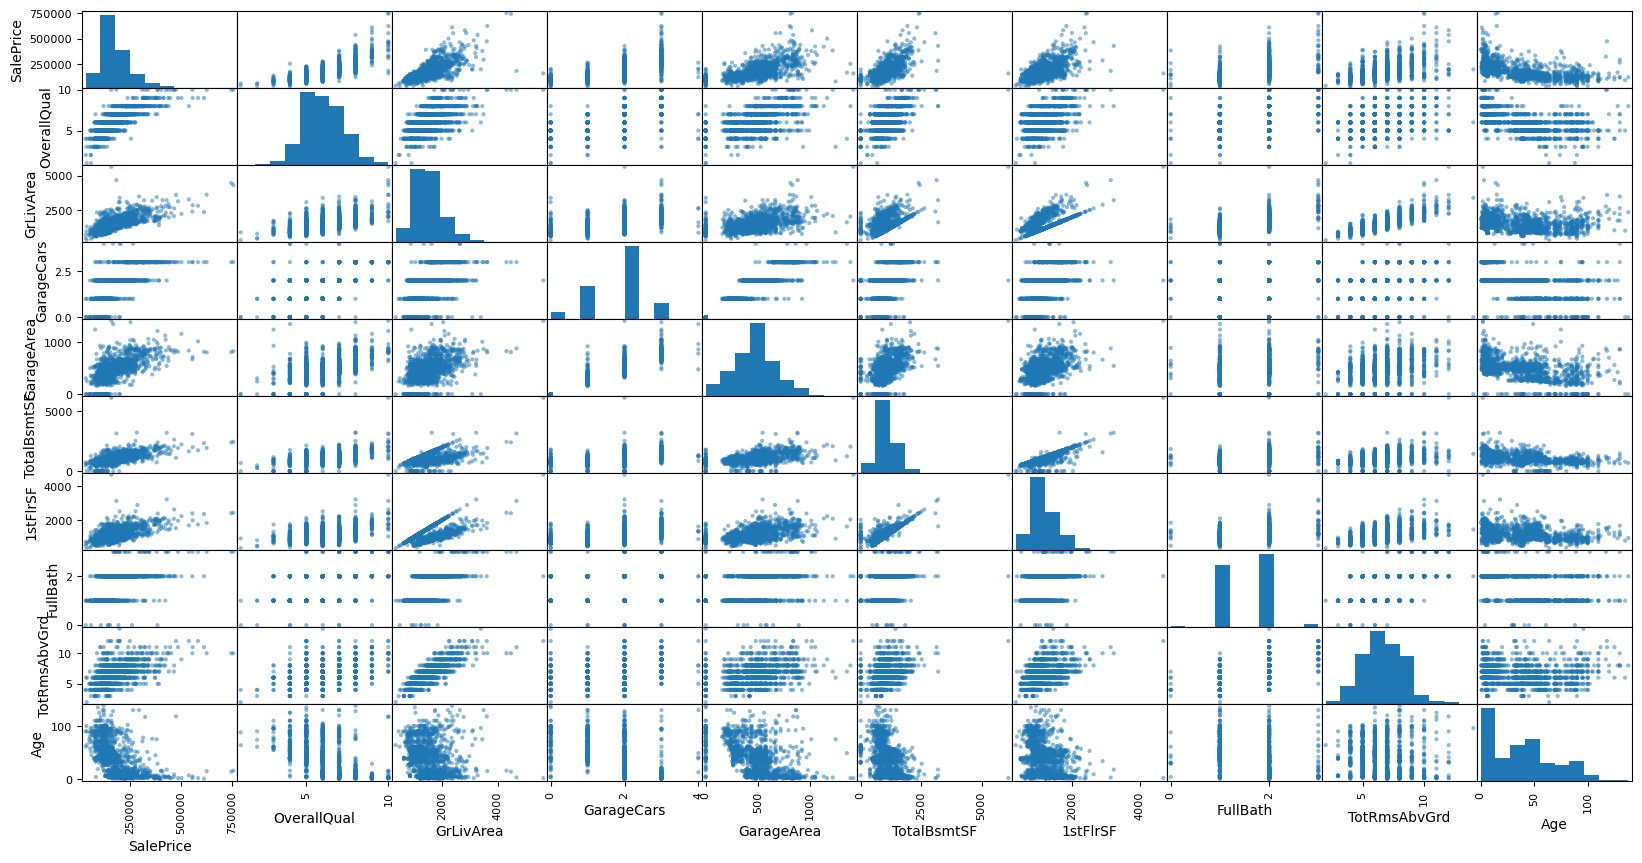

In [67]:
def align_expand_and_fill(df_a, df_b):
    df_a = df_a[df_b.columns.intersection(df_a.columns)]
    missing_columns = [col for col in df_b.columns if col not in df_a.columns]
    for col in missing_columns:
        df_a[col] = 0
    df_a = df_a[df_b.columns]
    return df_a
    
# importing local modules is pain, so base code located here.
class GenericTrainDataset:
    def __init__(self, df):
        self._df = df

    def _split_numeric(self, df):
        numeric_df = df.select_dtypes(include=['number'])
        non_numeric_df = df.select_dtypes(exclude=['number'])
        return numeric_df, non_numeric_df

    def _impute_nums(self, df):
        num, non_num = self._split_numeric(df)
        imputer = SimpleImputer(strategy="median")
        imputer.fit(num)
        X = imputer.transform(num)
        num_imputed = pd.DataFrame(X, columns=num.columns, index=num.index)
        return pd.concat([non_num, num_imputed], axis=1)

    def _prepare_non_nums(self, df):
        num, non_num = self._split_numeric(df)
        return pd.concat([num, pd.get_dummies(non_num)], axis=1)

    def _scale_features(self, df):
        return pd.DataFrame(StandardScaler().fit_transform(df.copy()), columns=df.columns, index=df.index)
    
    def prepare(self, target, test):
        prepared = self._prepare_non_nums(self._impute_nums(self._df))
        if test:
            features = self._scale_features(prepared)
            return features
        features = self._scale_features(prepared.drop(columns=[target]))
        labels = prepared[target]
        return features, labels


class Data:
    def __init__(self):
        raw_data = pd.read_csv("./data/train.csv")
        self._final_test = self.__prepare(pd.read_csv("./data/test.csv"))
        self._train = self.__prepare(raw_data)
    
    def __prepare(self, rawDf):
        df = rawDf.copy()
        df = df.drop(columns=["Id"])
        df = self.__gen_data(df)
        return df

    def __gen_data(self, df):
        df["Age"] = df["YearBuilt"].max()-df["YearBuilt"]
        return df.drop(columns=["YearBuilt"])

    
    def _info(self):
        print(self._train.info())
        print(self._train.describe())

    def _show(self):
        self._train.hist(bins=50, figsize=(20,15))
        plt.show()
        
    def _correlation(self):
        corr_matrix = self._train.corr(numeric_only=True)
        print("================correlation(abs)================\n\n")
        print(corr_matrix["SalePrice"].abs().sort_values(ascending=False))
        print("================correlation(abs)================\n\n")

    def _get_most_correlated_attrs(self):
        corr_matrix = self._train.corr(numeric_only=True)
        sorted = corr_matrix["SalePrice"].abs().sort_values(ascending=False).head(10)
        return [(index) for index in sorted.index]
    
    def _scatter(self):
        print("================top 10 correlated(abs) features scatter pl================\n\n")
        attrs = self._get_most_correlated_attrs()
        pd_plot.scatter_matrix(self._train[attrs], figsize=(20,10))
        
    
    def describe(self):
        self._info()
        self._show()
        self._correlation()
        self._scatter()


    def make_train_frame(self):
        df = self._train
        # df = self._train[(self._train["SalePrice"] >= 50000) & (self._train["SalePrice"] <= 400000)]
        dataset = GenericTrainDataset(df)
        features, labels = dataset.prepare("SalePrice", False)
        return features, labels

    def make_test_frame(self):
        df = self._final_test
        # df = self._test[(self._test["SalePrice"] >= 50000) & (self._test["SalePrice"] <= 400000)]
        dataset = GenericTrainDataset(df)
        return dataset.prepare("SalePrice", True)


class Model:
    # Data should not contain NaN's
    def __init__(self, data):
        self._data = data

    def test_prediction(self, RegressorModel):
        featured_df, labels = self._data.make_train_frame()
        reg=RegressorModel(l1_ratio=0.2)
        reg.fit(featured_df, labels)
        featured_test_df = self._data.make_test_frame()

        ds = align_expand_and_fill(featured_test_df, featured_df).sort_index()
        prediction = reg.predict(ds)
        df = pd.DataFrame({})
        df['SalePrice']=prediction
        df['Id'] = df.index + 1461
        return df
    
    def simple_train_and_cv(self, RegressorModel):
        featured_df, labels = self._data.make_train_frame()
        reg=RegressorModel()
        reg.fit(featured_df, labels)
        prediction = reg.predict(featured_df)
        lin_mse = mean_squared_error(labels, prediction)
        lin_rmse = np.sqrt(lin_mse)
        
        print("================{}================\n\n".format(RegressorModel))
        predictions = reg.predict(featured_df)
        mse = mean_squared_error(labels, predictions)
        rmse = np.sqrt(mse)
        print("RMSE on validation set: {}".format(rmse))
        self._cross_validate(reg)
        print("\n\n================{}================\n\n".format(RegressorModel))

    def _cross_validate(self, reg):
        featured_df, labels = self._data.make_train_frame()
        category_bins = pd.cut(labels, bins=10, labels=False)  
        skf = StratifiedKFold(n_splits=20)
        generator = skf.split(labels, category_bins)
        scores = cross_val_score(reg, featured_df, labels, scoring="neg_mean_squared_error", cv=generator)
        rmse_scores = np.sqrt(np.log(-scores))
        self._display_scores(rmse_scores)

    def _display_scores(self, scores):
        print("\nCV errors(lower is better):", scores)
        print("CV errors Mean(lower is better):", scores.mean())
        print("CV errors Standard deviation(lower is better): {} \n".format(scores.std()))
        
data = Data()
data.describe()
model = Model(data)
model.simple_train_and_cv(ElasticNet)
model.simple_train_and_cv(DecisionTreeRegressor)
model.simple_train_and_cv(RandomForestRegressor)
print("start")
model.test_prediction(ElasticNet).to_csv('result.csv', index=False)
print("ok")